In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv('insurance_claim_fraud.csv')
df=pd.DataFrame(df)

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.shape

(1000, 40)

We have data of dimension 1000 rows and 40 columns, columns names are shown above.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We have data which comprise of 17 columns that are of interger type, 21 columns that are object type and 2 columns of float data type.

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We do not have any missing values present in data set that except _c39 column which have all the data missing hence we will go further drop that column.

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


We can observe the details of counts, mean standard, minimum, maximum values along with data percent.

# EDA

In [9]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

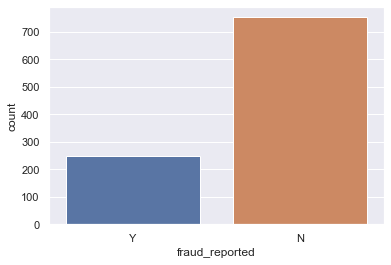

In [10]:
sns.countplot(x='fraud_reported',data=df)

We have data where 247 fraud were reported rest 753 were not reported.

In [11]:
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

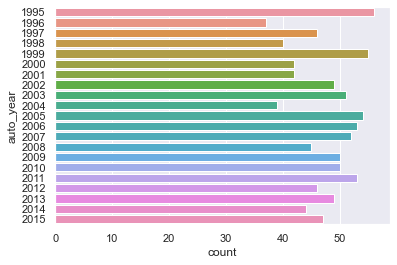

In [12]:
sns.countplot(y='auto_year',data=df)   # data of Auto year

In [13]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
95                27
F150              27
E400              27
93                25
Grand Cherokee    25
Tahoe             24
Maxima            24
Escape            24
Ultima            23
X5                23
Silverado         22
Highlander        22
Civic             22
Fusion            21
TL                20
Corolla           20
CRV               20
ML350             20
Impreza           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

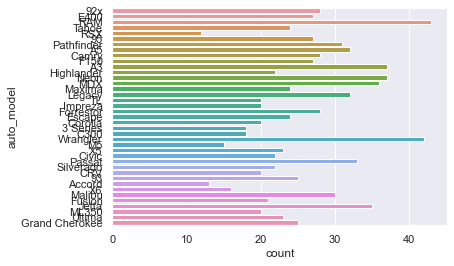

In [14]:
sns.countplot(y='auto_model',data=df)

In [15]:
df['vehicle_claim'].value_counts()

5040     7
3360     6
3600     5
44800    5
33600    5
        ..
46680    1
3640     1
34320    1
40530    1
51200    1
Name: vehicle_claim, Length: 726, dtype: int64

In [16]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

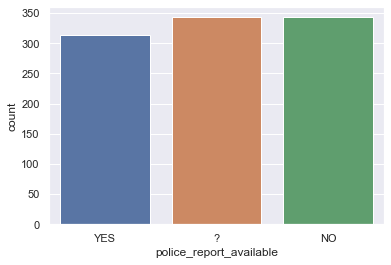

In [17]:
sns.countplot(x='police_report_available',data=df)   # 314 have police report, while 343 is the count of not having police report and 343 account have no information.

In [18]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

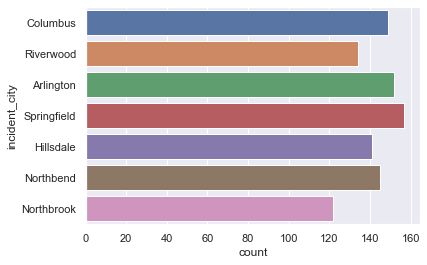

In [19]:
sns.countplot(y='incident_city',data=df)

We understand that Springfield has highest number of claims

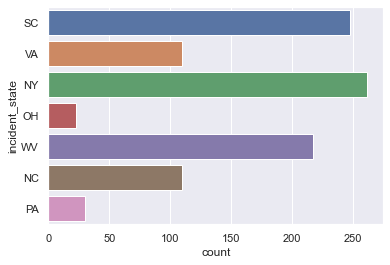

In [20]:
sns.countplot(y='incident_state',data=df)

We understand that NY, SC, WV have highest numbers.

In [21]:
df['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

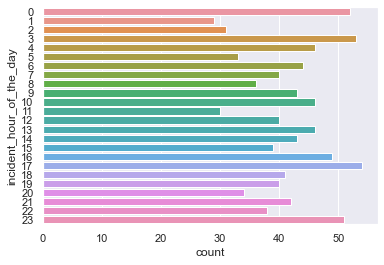

In [22]:
sns.countplot(y='incident_hour_of_the_day',data=df)

We understand that the accidents numbers are high during 17 hrs, 0 hr , 23hrs, 3 hrs.

In [23]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

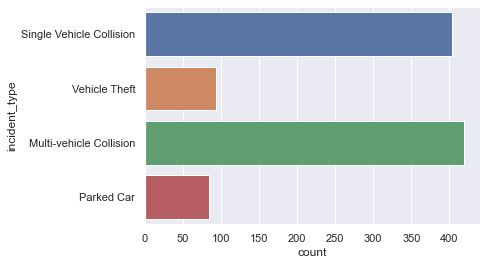

In [24]:
sns.countplot(y='incident_type',data=df)

We understand that the Multi-vehicle collisions have the highest numbers followed by Single vehicle collision.

In [25]:
df['insured_sex'].value_counts()          # Insurance sex information

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [26]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

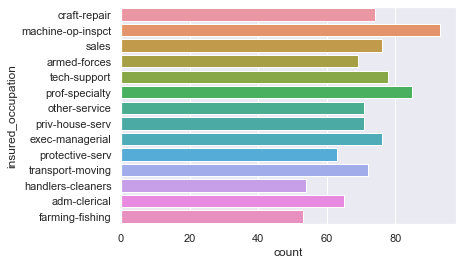

In [27]:
sns.countplot(y='insured_occupation',data=df)

Above is the information of occupation of insured.

In [28]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

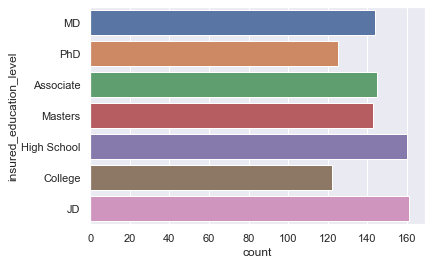

In [29]:
sns.countplot(y='insured_education_level',data=df)

Above is the information of educational qulification of insured.

months_as_customer                 AxesSubplot(0.125,0.71587;0.065678x0.16413)
age                             AxesSubplot(0.203814,0.71587;0.065678x0.16413)
policy_number                   AxesSubplot(0.282627,0.71587;0.065678x0.16413)
policy_deductable               AxesSubplot(0.361441,0.71587;0.065678x0.16413)
policy_annual_premium           AxesSubplot(0.440254,0.71587;0.065678x0.16413)
umbrella_limit                  AxesSubplot(0.519068,0.71587;0.065678x0.16413)
insured_zip                     AxesSubplot(0.597881,0.71587;0.065678x0.16413)
capital-gains                   AxesSubplot(0.676695,0.71587;0.065678x0.16413)
capital-loss                    AxesSubplot(0.755508,0.71587;0.065678x0.16413)
incident_hour_of_the_day        AxesSubplot(0.834322,0.71587;0.065678x0.16413)
number_of_vehicles_involved       AxesSubplot(0.125,0.518913;0.065678x0.16413)
bodily_injuries                AxesSubplot(0.203814,0.518913;0.065678x0.16413)
witnesses                      AxesSubplot(0.282627,

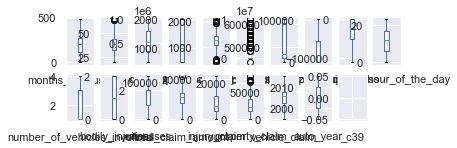

In [30]:
df.plot(kind='box',subplots=True, layout=(4,10))

We have details of outliers.

In [33]:
df=df.drop('_c39', axis = 1)
df=df.drop('policy_csl', axis = 1)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [34]:
df.shape

(1000, 38)

In [35]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [36]:
# Spliting the date of journy in days and months

df["Policy_Day"] = df['policy_bind_date'].str.split('-').str[0].astype(int)
df["Policy_Month"] = df['policy_bind_date'].str.split('').str[1].astype(int)     #Feature engineering adding two new column Day and Month.

#Droping the policy_bind_date column 
df.drop(["policy_bind_date"], axis = 1, inplace = True)

df["incident_day"] = df['incident_date'].str.split('-').str[0].astype(int)
df["incident_month"] = df['incident_date'].str.split('').str[1].astype(int)     #Feature engineering adding 

#Droping the incident_date of Journy column 
df.drop(["incident_date"], axis = 1, inplace = True)


In [37]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,incident_day,incident_month
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,...,13020,52080,Saab,92x,2004,Y,17,1,25,2
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,...,780,3510,Mercedes,E400,2007,Y,27,2,21,2
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,...,3850,23100,Dodge,RAM,2007,N,6,0,22,2
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,50720,Chevrolet,Tahoe,2014,Y,25,2,10,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,...,650,4550,Accura,RSX,2009,N,6,0,17,1


In [38]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
var_mod = ['policy_state','insured_sex','auto_make','auto_model','fraud_reported','insured_education_level'
            ,'insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity',
           'authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available' ]

for i in var_mod:
    df[i] = LE.fit_transform(df[i])

In [39]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,incident_day,incident_month
0,328,48,521585,2,1000,1406.91,0,466132,1,4,...,13020,52080,10,1,2004,1,17,1,25,2
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,...,780,3510,8,12,2007,1,27,2,21,2
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,...,3850,23100,4,30,2007,0,6,0,22,2
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,...,6340,50720,3,34,2014,1,25,2,10,1
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,...,650,4550,0,31,2009,0,6,0,17,1


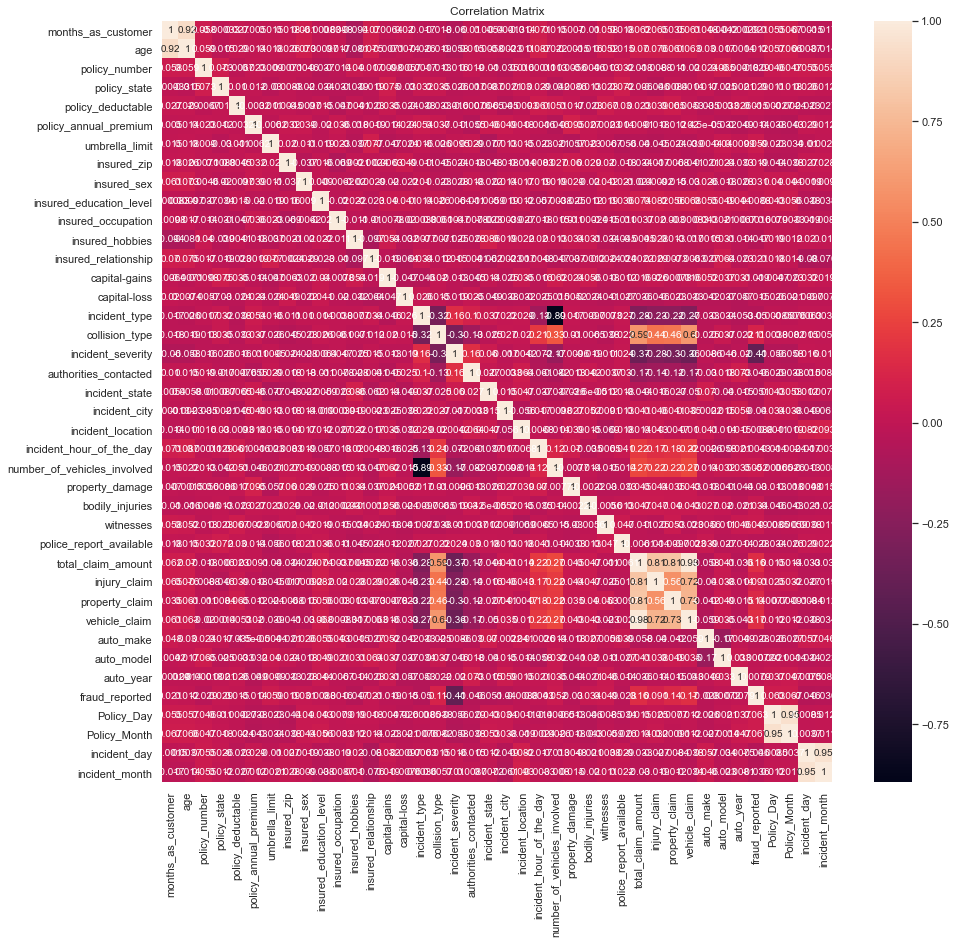

In [41]:
corr_mat=df.corr()
plt.figure(figsize=[15,14])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

We observe that the Total amount claim, injury claim, property claim and vehicle claim have significant relation with Fraud reported.
Where as accident severity less relationship. Other factors too have considerable relationship which cannot be ignored to predict the fraud.

In [42]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418


We observe that there is no skewness present in the data whcih is good.

# Model

This is an example of classification hence we will check with different classifier models.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y = df['fraud_reported']
x = df.drop('fraud_reported', axis = 1)

In [45]:
x.head()


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_Day,Policy_Month,incident_day,incident_month
0,328,48,521585,2,1000,1406.91,0,466132,1,4,...,6510,13020,52080,10,1,2004,17,1,25,2
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,...,780,780,3510,8,12,2007,27,2,21,2
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,...,7700,3850,23100,4,30,2007,6,0,22,2
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,...,6340,6340,50720,3,34,2014,25,2,10,1
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,...,1300,650,4550,0,31,2009,6,0,17,1


In [46]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(800, 39) (200, 39)
(800,) (200,)


Data is perfect hence we do not need to fit it anymore hence we will not perform over or underfitting of data.

In [49]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()        
lg

LogisticRegression()

In [50]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\Techitfirst\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
y_pred = lg.predict(x_test)

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))                  # Logistic regression
print(classification_report(y_test,pred))

0.745
[[149   0]
 [ 51   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       149
           1       0.00      0.00      0.00        51

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.56      0.74      0.64       200



C:\Users\Techitfirst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)                                       #Decision tree classifier
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.78
[[130  19]
 [ 25  26]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       149
           1       0.58      0.51      0.54        51

    accuracy                           0.78       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.77      0.78      0.78       200



In [55]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)                       # Random forest classifier
print (accuracy_score(y_test,predrf))
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

0.775
[[139  10]
 [ 35  16]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       149
           1       0.62      0.31      0.42        51

    accuracy                           0.78       200
   macro avg       0.71      0.62      0.64       200
weighted avg       0.75      0.78      0.75       200



In [56]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lg, x,y, cv=5)
print("Cross Validation score of LogisticRegression model :",scr.mean())

C:\Users\Techitfirst\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Techitfirst\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Cross Validation score of LogisticRegression model : 0.75


C:\Users\Techitfirst\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt, x,y, cv=5)
print("Cross Validation score of DecisionTree model :",scr.mean())

Cross Validation score of DecisionTree model : 0.773


In [58]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x,y, cv=5)
print("Cross Validation score of RandomForest model :",scr.mean())

Cross Validation score of RandomForest model : 0.768


RF= 0.775-0.768=0.007

DT= 0.773-0.78= 0.007

lg= 0.745-0.75= 0.005

From cross validation and accuracy score data we conclude that Logistic regression is the best model.

Hyper parameter tunning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}
lg = LogisticRegression(
    random_state=10,
    class_weight="balanced",
    solver="liblinear",
)

lg = GridSearchCV(
    lg, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

lg.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=10, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [61]:

lg.best_params_
lg_pred=lg.best_estimator_.predict(x_test)
accuracy_score(y_test,lg_pred)

0.725

We have have achived the tunning result as 0.725.

Saving the best model

In [63]:
import joblib
joblib.dump(lg.best_estimator_,"insurance_claim_fraud.pkl")

['insurance_claim_fraud.pkl']